<a href="https://colab.research.google.com/github/Karansaini260/Unified-mentor/blob/main/Drug_side_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('/content/drugs_side_effects_drugs_com.csv')
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [35]:
# Fill missing ratings with the mean rating
df_cleaned = df.copy()
df_cleaned['rating'] = df_cleaned['rating'].fillna(df_cleaned['rating'].mean())

# Handle missing side effects by replacing NaN with 'Unknown'
df_cleaned['side_effects'] = df_cleaned['side_effects'].fillna('Unknown')

# Handle missing brand names by replacing NaN with the drug name
df_cleaned['brand_names'] = df_cleaned['brand_names'].fillna(df_cleaned['drug_name'])

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['generic_name', 'drug_classes', 'activity', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# Convert 'activity' to numeric, coercing errors
df_cleaned['activity'] = pd.to_numeric(df_cleaned['activity'], errors='coerce').fillna(0)


# Display the info and head of the cleaned dataframe
df_cleaned.info()
display(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2931 non-null   object 
 3   generic_name                   2931 non-null   object 
 4   drug_classes                   2931 non-null   object 
 5   brand_names                    2931 non-null   object 
 6   activity                       2931 non-null   float64
 7   rx_otc                         2931 non-null   object 
 8   pregnancy_category             2931 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        2931 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

/tmp/ipython-input-2440525491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['rating'].fillna(df_cleaned['rating'].mean(), inplace=True)
/tmp/ipython-input-2440525491.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",0.0,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",0.0,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",0.0,Rx,D,N,Unknown,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",Accutane,0.0,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",0.0,Rx,B,N,Unknown,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [37]:
df_cleaned.isna().sum()

,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
brand_names,0
activity,0
rx_otc,0
pregnancy_category,0
csa,0


In [42]:
# Create a new feature for the number of side effects
df_cleaned['num_side_effects'] = df_cleaned['side_effects'].apply(lambda x: len(x.split(';')) if isinstance(x, str) and x != 'Unknown' else 0)

# One-hot encode categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['rx_otc', 'csa', 'pregnancy_category'], dummy_na=True)

# Display the first few rows of the dataframe with new features
display(df_cleaned.head())

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,alcohol,related_drugs,medical_condition_description,...,csa_U,csa_nan,pregnancy_category_A,pregnancy_category_B,pregnancy_category_C,pregnancy_category_D,pregnancy_category_N,pregnancy_category_Unknown,pregnancy_category_X,pregnancy_category_nan
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",0.0,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,...,False,False,False,False,False,True,False,False,False,False
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",0.0,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,...,False,False,False,False,True,False,False,False,False,False
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",0.0,Unknown,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,...,False,False,False,False,False,True,False,False,False,False
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",Accutane,0.0,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,...,False,False,False,False,False,False,False,False,True,False
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",0.0,Unknown,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,...,False,False,False,True,False,False,False,False,False,False


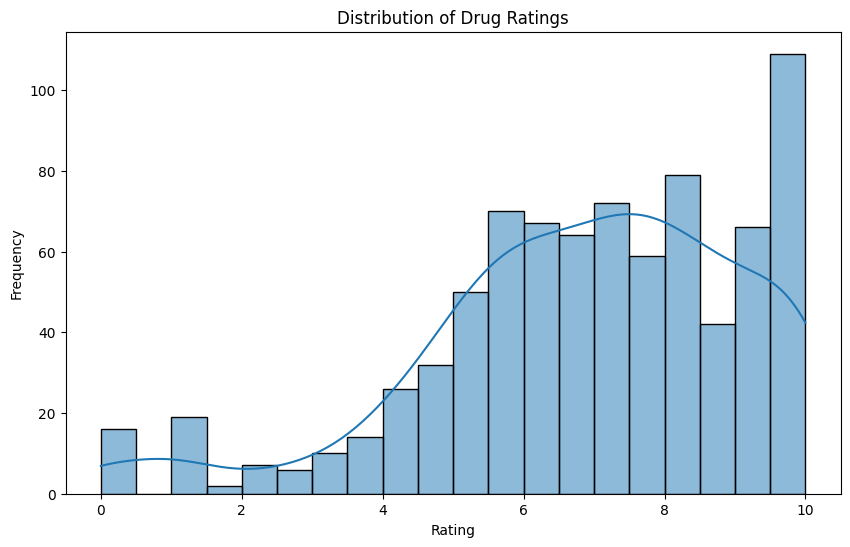

In [43]:
# Distribution of drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['rating'], bins=20, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

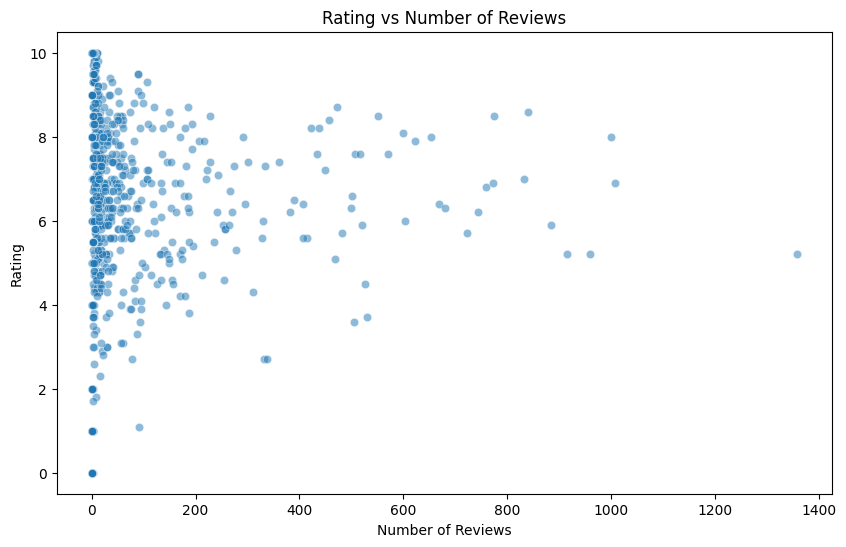

In [44]:
# Relationship between rating and number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_reviews', y='rating', data=df_cleaned, alpha=0.5)
plt.title('Rating vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

In [45]:
# Top medical conditions by count
top_medical_conditions = df_cleaned['medical_condition'].value_counts().nlargest(10)
print("Top 10 Medical Conditions by Count:")
print(top_medical_conditions)

# Average rating for top medical conditions
avg_rating_per_condition = df_cleaned.groupby('medical_condition')['rating'].mean().loc[top_medical_conditions.index].sort_values(ascending=False)
print("\nAverage Rating for Top 10 Medical Conditions:")
print(avg_rating_per_condition)

Top 10 Medical Conditions by Count:
medical_condition
Hypertension         62
Acne                 60
Pain                 52
Diabetes (Type 2)    44
AIDS/HIV             36
Hayfever             32
Migraine             30
Osteoarthritis       29
Insomnia             29
Diabetes (Type 1)    27
Name: count, dtype: int64

Average Rating for Top 10 Medical Conditions:
medical_condition
Migraine             7.693333
Acne                 7.368333
Hayfever             7.137500
Diabetes (Type 1)    6.977778
Pain                 6.886538
Osteoarthritis       6.500000
AIDS/HIV             6.422222
Insomnia             6.351724
Hypertension         5.798387
Diabetes (Type 2)    5.647727
Name: rating, dtype: float64


In [46]:
df_cleaned.dropna(subset=['related_drugs', 'no_of_reviews'], inplace=True)
df_cleaned.isna().sum()

,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
brand_names,0
activity,0
alcohol,0
related_drugs,0
medical_condition_description,0


In [65]:
from sklearn.model_selection import train_test_split

# Prepare data for modeling
# Drop columns that are not useful for modeling or are redundant after feature engineering
X = df_cleaned.drop(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
                     'drug_classes', 'brand_names', 'alcohol', 'related_drugs',
                     'medical_condition_description', 'drug_link', 'medical_condition_url',
                     'rating'], axis=1)
y = df_cleaned['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Display results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")

# Determine the best model based on MAE
best_model_name = min(results, key=lambda k: results[k]['MAE'])
best_mae = results[best_model_name]['MAE']

print(f"\nBest performing model based on MAE: {best_model_name} (MAE: {best_mae:.4f})")

Model Evaluation Results:

Linear Regression:
  MAE: 1.8881
  MSE: 6.3421
  RMSE: 2.5183

Ridge:
  MAE: 1.8761
  MSE: 6.1543
  RMSE: 2.4808

Lasso:
  MAE: 1.8387
  MSE: 5.8086
  RMSE: 2.4101

Random Forest:
  MAE: 1.8140
  MSE: 6.2340
  RMSE: 2.4968

Gradient Boosting:
  MAE: 1.8516
  MSE: 6.0113
  RMSE: 2.4518

Best performing model based on MAE: Random Forest (MAE: 1.8140)
